In [1]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler



In [2]:
def load_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    return [tweet.strip() for tweet in tweets]

def load_labels(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        labels = file.readlines()
    return [label.strip() for label in labels]

In [4]:
tweets_file_path = 'train_text.txt'
emojis_file_path = 'train_labels.txt'

# Load tweets and labels
X = load_tweets(tweets_file_path)
y = load_labels(emojis_file_path)

# Assuming 'X' contains your preprocessed tweet text and 'y' contains corresponding emojis
X_train, X_test_locked, y_train, y_test_locked = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train, random_state=42)

# Apply oversampling to the training set
#oversampler = RandomOverSampler(random_state=42)
#X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [5]:
# Convert text data to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test_locked)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [6]:
# Train SVC
svm_model = SVC(kernel='linear',class_weight='balanced')
svm_model.fit(X_train_tfidf, y_train)

In [33]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [34]:
from sklearn.metrics import f1_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
f1=f1_score(y_test, y_pred, average='weighted')
print(f1)

Accuracy: 0.19875
0.20317740668481105


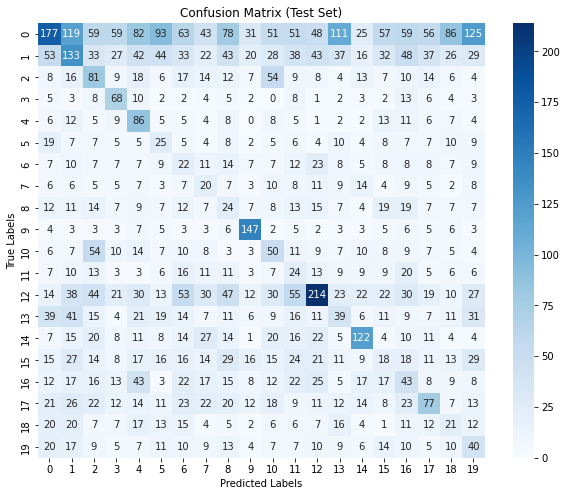

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [36]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.12      0.18      1473
           1       0.25      0.17      0.20       784
          10       0.19      0.26      0.22       317
          11       0.23      0.45      0.31       151
          12       0.19      0.43      0.27       199
          13       0.08      0.16      0.11       157
          14       0.06      0.11      0.08       196
          15       0.07      0.13      0.09       149
          16       0.06      0.11      0.08       216
          17       0.50      0.66      0.57       224
          18       0.14      0.21      0.17       242
          19       0.07      0.13      0.09       191
           2       0.43      0.28      0.34       754
           3       0.12      0.12      0.12       327
           4       0.40      0.36      0.37       343
           5       0.07      0.05      0.06       341
           6       0.12      0.13      0.12       332
    